In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MyML.TSLogisticRegression as LogReg

In [2]:
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)

In [3]:
data = pd.read_excel('Proteins.xls').as_matrix()

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
newdata = oneHotEncode(data,[len(data[0,])-1])

In [5]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test

In [6]:
train,val,test = TVTsplit(newdata)

In [7]:
Ytrain = train[:,(len(train[0,])-8):]
Xtrain = train[:,:(len(train[0,])-8)]
Yval = val[:,(len(val[0,])-8):]
Xval = val[:,:(len(val[0,])-8)]
Ytest = test[:,(len(test[0,])-8):]
Xtest = test[:,:(len(test[0,])-8)]

In [8]:
def asnumeric(x):
    return list(map(float,x))

Xtrain = np.matrix(list(map(asnumeric,Xtrain.T))).T
Xval = np.matrix(list(map(asnumeric,Xval.T))).T
Xtest = np.matrix(list(map(asnumeric,Xtest.T))).T

In [9]:
trainmins = np.array(list(map(np.nanmin,Xtrain.T)))
trainmaxs = np.array(list(map(np.nanmax,Xtrain.T)))

In [10]:
Xtrain = np.where(np.isnan(Xtrain), np.ma.array(Xtrain, mask=np.isnan(Xtrain)).mean(axis=0), Xtrain)
Xval = np.where(np.isnan(Xval), np.ma.array(Xtrain, mask=np.isnan(Xtrain)).mean(axis=0), Xval)
Xtest = np.where(np.isnan(Xtest), np.ma.array(Xtrain, mask=np.isnan(Xtrain)).mean(axis=0), Xtest)

In [11]:
for i in range(0,len(Xtrain[0,])):
    Xtrain[:,i] = (Xtrain[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xval[:,i] = (Xval[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xtest[:,i] = (Xtest[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])


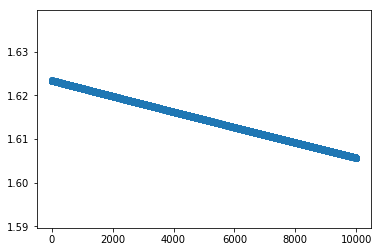

In [176]:
# w = np.random.randn(len(Xtrain[0,])*len(Ytrain[0,]))
# w = np.matrix(w).reshape(len(Xtrain[0,]),len(Ytrain[0,]))
inds = []

# for i in range(0)
cost = []
for i in range(0,10000):
    w = w - .001*Xtrain.T@(softmax(Xtrain@w) - Ytrain)
    CEC = -np.sum(np.multiply(Yval,np.log(softmax(Xval@w))))
    inds.append(i)
    cost.append(CEC)
plt.scatter(inds,cost)

In [177]:
CEC

1.6057097272814729

In [178]:
print(np.mean(np.rint(softmax(Xval@w)) == Yval))
np.sum(np.multiply(np.rint(softmax(Xval@w)),Yval))/np.sum(Yval)

1.0


1.0

In [282]:
Ytest = np.matrix(Ytest)
print(np.mean(np.rint(softmax(Xtest@w)) == Ytest))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest))/np.sum(Ytest))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,0] == Ytest[:,0]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,0])/np.sum(Ytest[:,0]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,1] == Ytest[:,1]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,1])/np.sum(Ytest[:,1]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,2] == Ytest[:,2]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,2])/np.sum(Ytest[:,2]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,3] == Ytest[:,3]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,3])/np.sum(Ytest[:,3]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,4] == Ytest[:,4]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,4])/np.sum(Ytest[:,4]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,5] == Ytest[:,5]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,5])/np.sum(Ytest[:,5]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,6] == Ytest[:,6]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,6])/np.sum(Ytest[:,6]))
print('New')
print(np.mean(np.rint(softmax(Xtest@w))[:,7] == Ytest[:,7]))
print(np.sum(np.multiply(np.rint(softmax(Xtest@w)),Ytest)[:,7])/np.sum(Ytest[:,7]))

0.9938271604938271
0.9753086419753086
New
0.9876543209876543
0.9333333333333333
New
0.9876543209876543
0.9629629629629629
New
0.9876543209876543
0.9375
New
0.9938271604938271
1.0
New
1.0
1.0
New
1.0
1.0
New
0.9938271604938271
0.9583333333333334
New
1.0
1.0


In [255]:
print(np.where(w[:,7]>6))
w[np.where(w[:,7]>6),7]

(array([31, 32, 41, 45, 46]), array([0, 0, 0, 0, 0]))


matrix([[ 7.77228576,  7.0370215 ,  6.34482801,  6.05863056,  8.91682449],
        [-1.28970308, -1.28970308, -1.28970308, -1.28970308, -1.28970308]])

In [280]:
np.matrix(Ytest).shape

(162, 8)

In [12]:
model = LogReg.TSLogisticRegression(len(Xtrain[0,]), len(Ytrain[0,]))

In [13]:
len(Xtrain[0,])

77

78


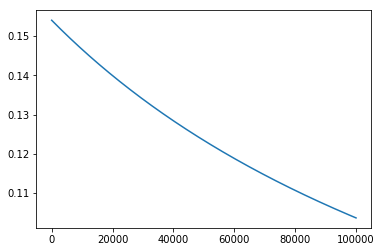

In [63]:
model.train(Xtrain,Ytrain, epochs = 100000)

In [33]:
if not (np.min(Xtrain[:,0]) == 1 and np.max(Xtrain[:,0]) == 1):
        R = np.column_stack((np.ones(len(Xtrain[:,0])),Xtrain))

In [34]:
if not (np.min(R[:,0]) == 1 and np.max(R[:,0]) == 1):
        R = np.column_stack((np.ones(len(Xtrain[:,0])),Xtrain))

In [35]:
R

array([[1.        , 0.1511224 , 0.21288505, ..., 0.10288975, 0.08457952,
        0.69768624],
       [1.        , 0.1557504 , 0.18822566, ..., 0.11587379, 0.09397699,
        0.74292446],
       [1.        , 0.15345859, 0.20569615, ..., 0.10904993, 0.08216206,
        0.86462313],
       ...,
       [1.        , 0.07633021, 0.1729983 , ..., 0.32726581, 0.33921834,
        0.30354444],
       [1.        , 0.07884492, 0.1761187 , ..., 0.33499901, 0.38672068,
        0.31051347],
       [1.        , 0.08035332, 0.18254477, ..., 0.3744123 , 0.3256913 ,
        0.27651607]])